In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from pyramid.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("dd.csv")
df1=df[df.ItemId==972142]

In [11]:
df2=df1[['WeekNoinTotal','QTY']]
df2=df2.set_index('WeekNoinTotal')
df2.index = pd.DatetimeIndex(freq='w', start='2014-01-01', periods=197)
df2.head()

,QTY
2014-01-05,4
2014-01-12,35
2014-01-19,46
2014-01-26,39
2014-02-02,31


(array([735234., 735415., 735599., 735780., 735964., 736146., 736330.,
        736511.]), <a list of 8 Text xticklabel objects>)

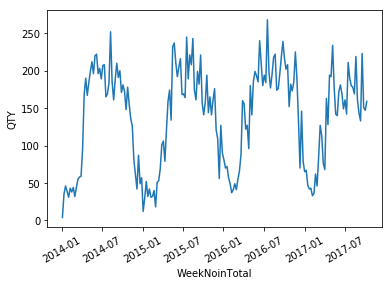

In [16]:
plt.plot(df2)
plt.ylabel('QTY')
plt.xlabel('WeekNoinTotal')
plt.xticks(rotation=30)

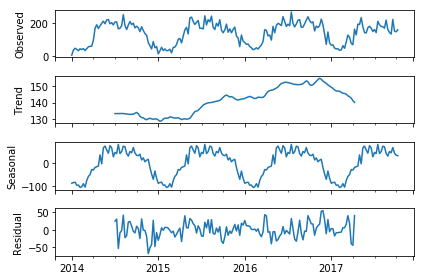

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df2, model='additive')
fig=decomposed.plot()

In [23]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(df2, start_p=0, start_q=0,
                           max_p=1, max_q=1, m=52,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=1495.955, BIC=1501.895, Fit time=0.806 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=1473.831, BIC=1485.711, Fit time=11.170 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=1475.946, BIC=1484.856, Fit time=1.107 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 52); AIC=1465.217, BIC=1480.066, Fit time=47.200 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 52); AIC=1482.429, BIC=1494.308, Fit time=34.120 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 0, 52); AIC=1434.918, BIC=1452.737, Fit time=59.695 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); AIC

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1934.716, BIC=1954.416, Fit time=0.453 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=2210.733, BIC=2217.299, Fit time=0.023 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1942.237, BIC=1952.087, Fit time=0.099 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=2088.519, BIC=2098.369, Fit time=0.135 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1932.913, BIC=1949.329, Fit time=0.302 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1930.924, BIC=1944.057, Fit time=0.141 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1932.914, BIC=1949.330, Fit time=0.332 seconds
Total fit time: 1.596 seconds


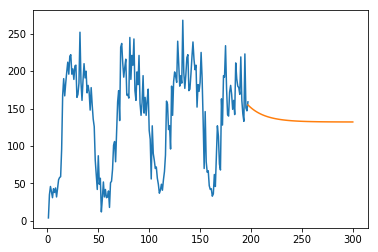

In [11]:
model1 = auto_arima(df2['QTY'], start_D=1, trace=True, error_action='ignore', suppress_warnings=True)
model1.fit(df2['QTY'])

forecast = model1.predict(n_periods=104)
forecast= pd.DataFrame(forecast, index =list(range(197, 104+197)), columns=['Prediction'])

#plot the predictions for next 2 years
plt.plot(df2['QTY'], label='Observed')
plt.plot(forecast, label='Prediction')
plt.show()

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  197
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -961.462
Date:                Fri, 28 Dec 2018   AIC                           1930.924
Time:                        16:52:40   BIC                           1944.057
Sample:                             0   HQIC                          1936.241
                                - 197                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.7754      3.893      1.997      0.046       0.145      15.406
ar.L1          0.9411      0.029     32.694      0.000       0.885       0.998
ma.L1         -0.3058      0.071     -4.311      0.000      -0.445      -0.167
sigma2      1007.3713     95.957     10.498      0.000     819.298    1195.444
===================================================================================
Ljung-Box (Q):                       67.83   Jarque-Bera (JB):                 9.95
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.84   Skew:                             0.53
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from math import sqrt
rms = sqrt(mean_squared_error(df2['QTY'],forecast1))
print(rms)

NameError: name 'mean_squared_error' is not defined

In [16]:
model1 = auto_arima(df2['QTY'], start_D=1, trace=True, error_action='ignore', suppress_warnings=True)
result = model1.fit(df2['QTY'])

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1934.716, BIC=1954.416, Fit time=0.359 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=2210.733, BIC=2217.299, Fit time=0.014 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1942.237, BIC=1952.087, Fit time=0.116 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=2088.519, BIC=2098.369, Fit time=0.130 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1932.913, BIC=1949.329, Fit time=0.260 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1930.924, BIC=1944.057, Fit time=0.163 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1932.914, BIC=1949.330, Fit time=0.268 seconds
Total fit time: 1.321 seconds


In [19]:
forecast = result.get_forecast(steps=104)
forecast= pd.DataFrame(forecast, index =list(range(197, 104+197)), columns=['Prediction'])

#plot the predictions for next 2 years
plt.plot(df2['QTY'], label='Observed')
plt.plot(forecast, label='Prediction')
plt.show()

AttributeError: 'ARIMA' object has no attribute 'get_forecast'